# Import data

In [49]:
import pandas as pd
import numpy as np

data = pd.read_csv('gene_expression_risk_dataset.csv')

il1b = data['IL-1β'].tolist()
il6 = data['IL-6'].tolist()
tnfa = data['TNFα'].tolist()
risk = data['Disease Risk'].tolist()
group_array = list(zip(il1b, il6, tnfa, risk))

def get_data():
    return np.array(group_array)

# Membership function

C:\Users\Nitro5\AppData\Local\Temp\ipykernel_22376\3037139271.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.clip((x - a) / (b - a), 0, 1) * np.clip((c - x) / (c - b), 0, 1)
C:\Users\Nitro5\AppData\Local\Temp\ipykernel_22376\3037139271.py:5: RuntimeWarning: invalid value encountered in divide
  return np.clip((x - a) / (b - a), 0, 1) * np.clip((c - x) / (c - b), 0, 1)


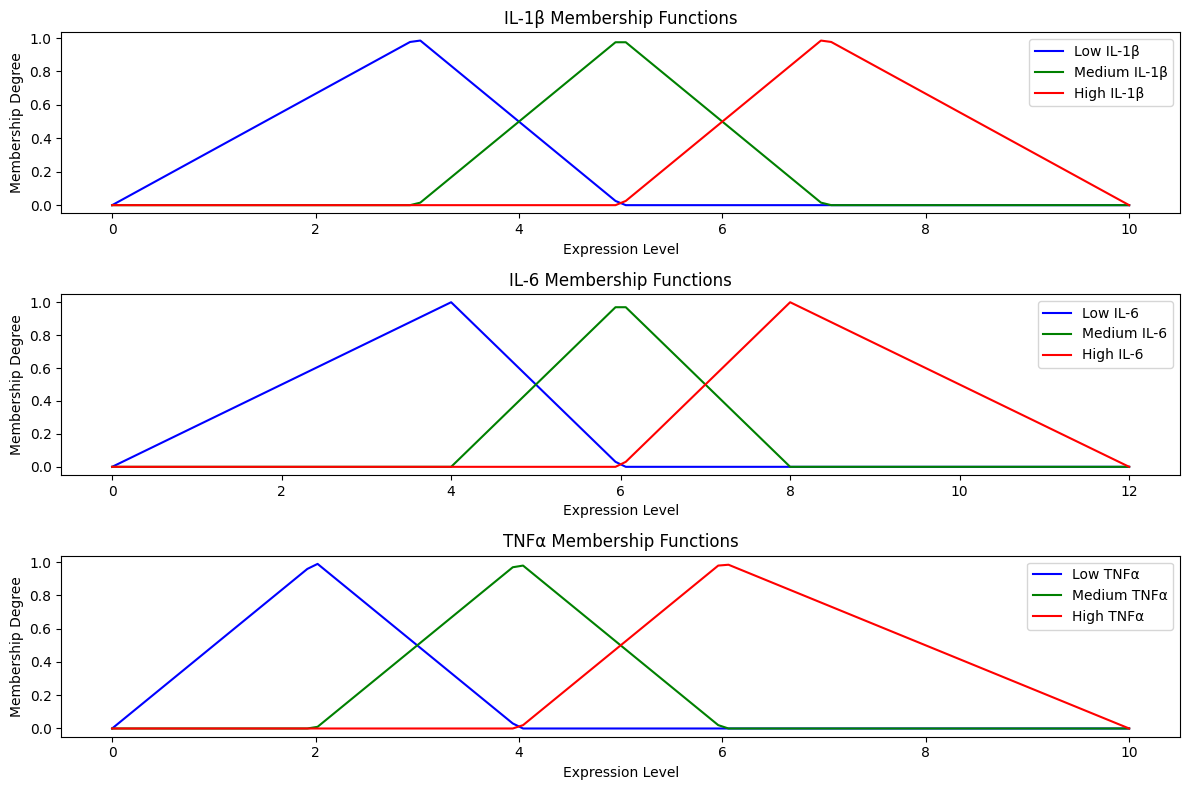

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def triangular_memfunc(x, a, b, c):
    return np.clip((x - a) / (b - a), 0, 1) * np.clip((c - x) / (c - b), 0, 1)


# ======================== membership function ========================

# input range 
x_il1b = np.linspace(0, 10, 100)
x_il6 = np.linspace(0, 12, 100)
x_tnfa = np.linspace(0, 10, 100)
x_risk = np.linspace(0, 2, 100)

# IL-1β membership function 
il1b_low = triangular_memfunc(x_il1b, 0, 3, 5)
il1b_medium = triangular_memfunc(x_il1b, 3, 5, 7)
il1b_high = triangular_memfunc(x_il1b, 5, 7, 10)

# IL-6 membership function 
il6_low = triangular_memfunc(x_il6, 0, 4, 6)
il6_medium = triangular_memfunc(x_il6, 4, 6, 8)
il6_high = triangular_memfunc(x_il6, 6, 8, 12)

# TNFα membership function 
tnfa_low = triangular_memfunc(x_tnfa, 0, 2, 4)
tnfa_medium = triangular_memfunc(x_tnfa, 2, 4, 6)
tnfa_high = triangular_memfunc(x_tnfa, 4, 6, 10)

# output membership function
risk_low = triangular_memfunc(x_risk, 0, 0, 1)
risk_medium = triangular_memfunc(x_risk, 0.5, 1, 1.5)
risk_high = triangular_memfunc(x_risk, 1, 1.5, 2)



# ======================== plot graph ========================

plt.figure(figsize=(12, 8))

# IL-1β
plt.subplot(3, 1, 1)
plt.plot(x_il1b, il1b_low, label='Low IL-1β', color='blue')
plt.plot(x_il1b, il1b_medium, label='Medium IL-1β', color='green')
plt.plot(x_il1b, il1b_high, label='High IL-1β', color='red')
plt.title('IL-1β Membership Functions')
plt.xlabel('Expression Level')
plt.ylabel('Membership Degree')
plt.legend()

# IL-6 
plt.subplot(3, 1, 2)
plt.plot(x_il6, il6_low, label='Low IL-6', color='blue')
plt.plot(x_il6, il6_medium, label='Medium IL-6', color='green')
plt.plot(x_il6, il6_high, label='High IL-6', color='red')
plt.title('IL-6 Membership Functions')
plt.xlabel('Expression Level')
plt.ylabel('Membership Degree')
plt.legend()

# TNFα 
plt.subplot(3, 1, 3)
plt.plot(x_tnfa, tnfa_low, label='Low TNFα', color='blue')
plt.plot(x_tnfa, tnfa_medium, label='Medium TNFα', color='green')
plt.plot(x_tnfa, tnfa_high, label='High TNFα', color='red')
plt.title('TNFα Membership Functions')
plt.xlabel('Expression Level')
plt.ylabel('Membership Degree')
plt.legend()

plt.tight_layout()
plt.show()


# Perform fuzzy inference system 

In [51]:
# ======================== fuzzification ========================
def fuzzification(input):

    il1b_low = triangular_memfunc(input[0], 0, 3, 5)
    il1b_medium = triangular_memfunc(input[0], 3, 5, 7)
    il1b_high = triangular_memfunc(input[0], 5, 7, 10)
    
    il6_low = triangular_memfunc(input[1], 0, 4, 6)
    il6_medium = triangular_memfunc(input[1], 4, 6, 8)
    il6_high = triangular_memfunc(input[1], 6, 8, 12)
    
    tnfa_low = triangular_memfunc(input[2], 0, 2, 4)
    tnfa_medium = triangular_memfunc(input[2], 2, 4, 6)
    tnfa_high = triangular_memfunc(input[2], 4, 6, 10)

    return (il1b_low, il1b_medium, il1b_high,
            il6_low, il6_medium, il6_high,
            tnfa_low, tnfa_medium, tnfa_high)

# ======================== rule base ========================
def rule_evaluation(fuzzy_value):

    il1b_low, il1b_medium, il1b_high = fuzzy_value[0:3]
    il6_low, il6_medium, il6_high = fuzzy_value[3:6]
    tnfa_low, tnfa_medium, tnfa_high = fuzzy_value[6:9]

    # apply rules
    risk_low = min(il1b_low, il6_low, tnfa_low)
    risk_low = min(il1b_medium, il6_low, tnfa_low)
    risk_low = min(il1b_low, il6_low, tnfa_medium)
    risk_medium = min(il1b_medium, il6_medium, tnfa_medium)
    risk_medium = min(il1b_medium, il6_low, tnfa_medium)
    risk_medium = min(il1b_low, il6_medium, tnfa_low)
    risk_medium = min(il1b_low, il6_medium, tnfa_medium)
    risk_high = max(il1b_high, il6_high, tnfa_high)

    return (risk_low, risk_medium, risk_high)

# ======================== defuzzification ========================
def defuzzification(risk_fuzzy):
    risk_low, risk_medium, risk_high = risk_fuzzy
    
    # use centroid method for defuzzification
    numerator = (risk_low * 0 + risk_medium * 1 + risk_high * 2)
    denominator = (risk_low + risk_medium + risk_high)

    return numerator / denominator if denominator != 0 else 0

# ======================== fuzzy variable of output ========================
def riskiness(output):
    if output < 0.5:
        risk_category = "Low"
    elif output < 1.5:
        risk_category = "Medium"
    else:
        risk_category = "High"
    return risk_category

# ======================== accuracy ========================
def accuracy(desire, actual):
    if(desire == actual):
        return True
    else:
        return False

In [52]:
input = get_data()

il1b_value = [row[0] for row in input]
il6_value = [row[1] for row in input]
tnfa_value = [row[2] for row in input]
risk_value = [row[3] for row in input]

with open("output.txt", "w") as file:
    for i in range(50): 
        input_value = (float(il1b[i]), float(il6[i]), float(tnfa_value[i]))

        fuzzy_value = fuzzification(input_value)
        risk_fuzzy = rule_evaluation(fuzzy_value)
        output = defuzzification(risk_fuzzy)
        risk = riskiness(output)
        acc = accuracy(risk_value[i], risk)

        print(f'output{i+1} Riskiness: {risk} \nOutput: {output} \naccurancy: {acc}')
        file.write(f'Riskiness: {risk}, Output: {output}, accurancy: {acc}\n')


output1 Riskiness: Low 
Output: 0 
accurancy: True
output2 Riskiness: Medium 
Output: 0.7703031161444995 
accurancy: True
output3 Riskiness: Medium 
Output: 0.7602483952829919 
accurancy: True
output4 Riskiness: High 
Output: 2.0 
accurancy: True
output5 Riskiness: Low 
Output: 0 
accurancy: True
output6 Riskiness: Low 
Output: 0.0 
accurancy: True
output7 Riskiness: High 
Output: 2.0 
accurancy: True
output8 Riskiness: High 
Output: 2.0 
accurancy: True
output9 Riskiness: Low 
Output: 0.2092530245104756 
accurancy: True
output10 Riskiness: High 
Output: 2.0 
accurancy: True
output11 Riskiness: Low 
Output: 0.0 
accurancy: True
output12 Riskiness: High 
Output: 2.0 
accurancy: True
output13 Riskiness: High 
Output: 2.0 
accurancy: True
output14 Riskiness: High 
Output: 2.0 
accurancy: True
output15 Riskiness: Low 
Output: 0.0 
accurancy: True
output16 Riskiness: High 
Output: 2.0 
accurancy: True
output17 Riskiness: Low 
Output: 0.0 
accurancy: True
output18 Riskiness: Low 
Output: 0 
